In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import pandas as pd
from churn_predictor.dataset import get_raw_dataframe
import churn_predictor.plot as plots

In [54]:
df = get_raw_dataframe()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


**Data Cleaning**

Dataset obtained from Kaggle: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

* Customer ID: A unique identifier for each customer  
* Surname: The customer's surname or last name  
* Credit Score: A numerical value representing the customer's credit score  
* Geography: The country where the customer resides (France, Spain or Germany)  
* Gender: The customer's gender (Male or Female)  
* Age: The customer's age  
* Tenure: The number of years the customer has been with the bank  
* Balance: The customer's account balance  
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)  
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)  
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)  
* EstimatedSalary: The estimated salary of the customer  
* Exited: Whether the customer has churned (1 = yes, 0 = no)  

Categorical variables: Geography, Gender, HasCrCard, IsActiveMember, Exited

Numerical variables: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [56]:
df = df.drop(columns=['RowNumber'])

In [57]:
df[df.duplicated(subset=['CustomerId'])]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


There are duplicate entries in the dataset based on the 'CustomerID' column. These duplicates do not provide additional value and may skew the analysis. Therefore, they will be removed to ensure data accuracy and consistency.

In [58]:
df = df.drop_duplicates()

There are few null values, and we will proceed to verify if these values contain unique information.

In [59]:
df[df.isnull().any(axis=1)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [60]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9999.000000,10000.000000,10000.000000,10000.000000,9999.000000,9999.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.923095,5.012800,76485.889288,1.530200,0.705471,0.515052,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487635,2.892174,62397.405202,0.581654,0.455854,0.499798,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Upon inspection, there are only 4 rows with null values out of 1000 entries, and the values in these rows fall within a normal range. Therefore, these rows will be removed as they do not represent significant changes in the dataset.

In [61]:
df = df.dropna()

**Examining distributions**

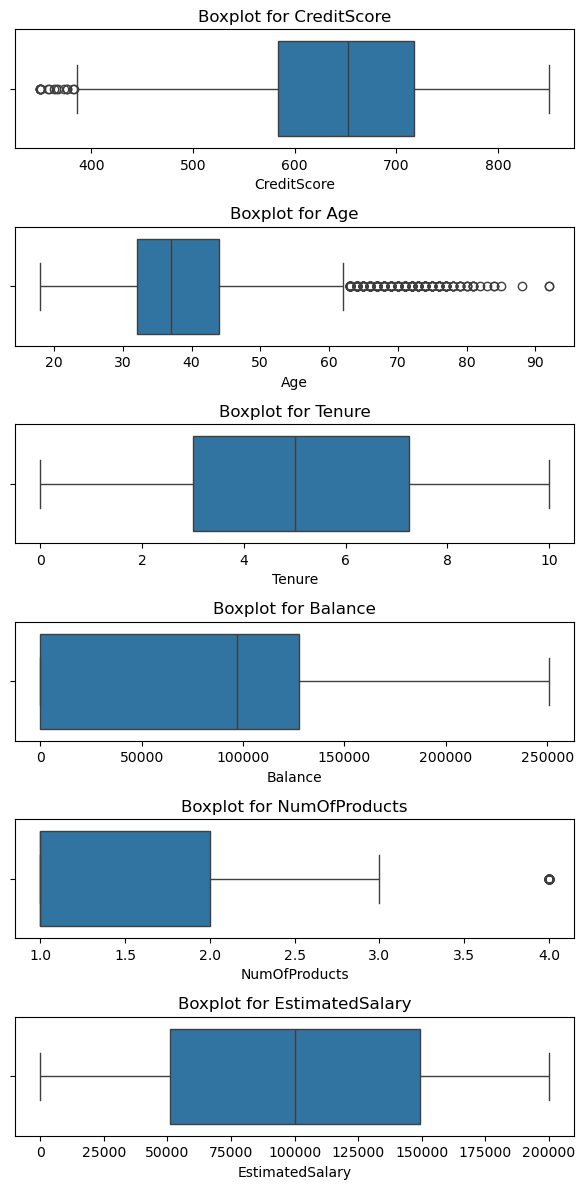

In [62]:
not_cat_vars = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
]
plots.plot_horizontal_boxplot(df, not_cat_vars)

* NumOfProducts: This variable indicates the number of bank products a customer uses. While there may be some outliers (e.g., customers using an unusually high number of products), it is reasonable to assume that customers with more products are highly engaged with the bank. Removing these outliers could exclude valuable insights into customers with complex needs, which could be important for understanding retention patterns.

* Age: Customer age can vary significantly, but it is a crucial metric. Even if there are extreme values (e.g., very young or elderly individuals), they still represent valid customer segments. These outliers could reflect distinct customer behaviors or needs, and removing them might result in losing insights into important customer demographics.

* CreditScore: Extreme credit scores (either very low or very high) can reveal important characteristics of customer risk or loyalty. A very low credit score may indicate a customer at risk of churn, while a high credit score could indicate a loyal, high-value customer. These outliers are essential for understanding different customer profiles and predicting churn behavior. Removing them would likely discard valuable information.

In conclusion, while these outliers may appear extreme, they provide valuable insights into different customer segments. Removing them could result in the loss of critical information that helps predict customer behavior and churn.

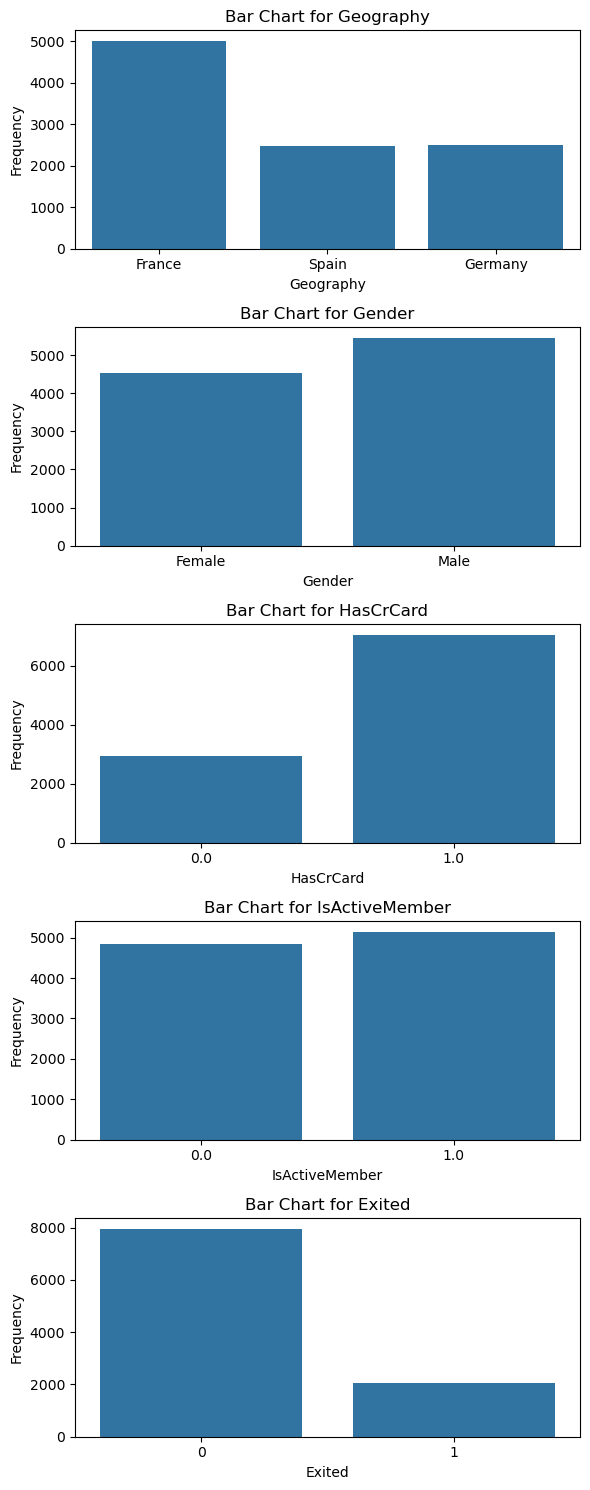

In [63]:
cat_vars = [
    'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'
]
plots.plot_bar_charts(df, cat_vars)

The purpose of these bar charts is to identify any unusual, unexpected, or unprocessed categories (e.g., misspelled categories or values outside the expected range). No additional categories were found that require further treatment.

There are no more issues with strange values, nulls, outliers, or negative values that need to be addressed. The dataset is now clean and ready for analysis.

In [64]:
from churn_predictor.utils.paths_internal import data_processed_dir
df.to_csv(data_processed_dir('cleaned_dataset.csv'), index=False)